## baseline

In [1]:
import nltk
nltk.download('rslp')

[nltk_data] Downloading package rslp to
[nltk_data]     /Users/manuelcostareis/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [2]:
import pandas as pd
import numpy as np

import re
import string
from numpy import inf

# Baseline 
from collections import Counter, OrderedDict
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import RSLPStemmer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.corpus import stopwords
stop_words = stopwords.words('portuguese')
import warnings; warnings.simplefilter('ignore')


# SKLearn related imports
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn import preprocessing

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity


# Phrase modelling
from gensim.models.phrases import Phrases, Phraser

import matplotlib.pyplot as plt
import seaborn as sns
import 

%matplotlib inline

random_state = 42

In [3]:
df = pd.read_csv('../data/train.csv')
df = df.dropna()
test = pd.read_csv('../data/test.csv')

## Exploring the data

26527

In [47]:
def most_common_words(df, label, stop_words):
    tokenizer = WordPunctTokenizer()
    punctuation = list(string.punctuation)
    punctuation.append('...')
    sentences = df[df.Label == label].Request
    counter = Counter()
    
    for sentence in sentences:
        sentence = tokenizer.tokenize(sentence)
        for word in sentence:
            if word not in stop_words and word not in punctuation:
                counter.update([word])
                
    return counter

In [52]:
conf = {}

for label in df.Label.unique():
    values = most_common_words(df, label, stop_words).most_common(100)
    values = [x[0] for x in values]
        
    conf[label] = values
    
conf = pd.DataFrame(conf) 

In [53]:
conf

,add_to_playlist,search_screening_event,book_restaurant,rate_book,get_weather,play_music,search_creative_work,no_intent
0,reprodução,filmes,Reserve,6,é,música,Encontre,É
1,lista,é,Eu,atual,Qual,Tocar,The,Vamos
2,Adicionar,próximo,restaurante,Eu,tempo,Jogue,encontrar,ver
3,Adicione,Theatres,reservar,pontos,previsão,anos,favor,Quero
4,música,Que,pessoas,estrelas,Será,músicas,TV,vai
5,adicionar,cinema,mesa,Classifique,Como,Eu,Eu,é
6,playlist,Encontre,preciso,Dê,aqui,tocar,Por,tempo
7,faixa,filme,quero,livro,daqui,quero,chamado,dizer
8,artista,horários,lugar,romance,atual,ouvir,of,Quer
9,álbum,tocando,serve,0,Diga,algumas,pode,Vai


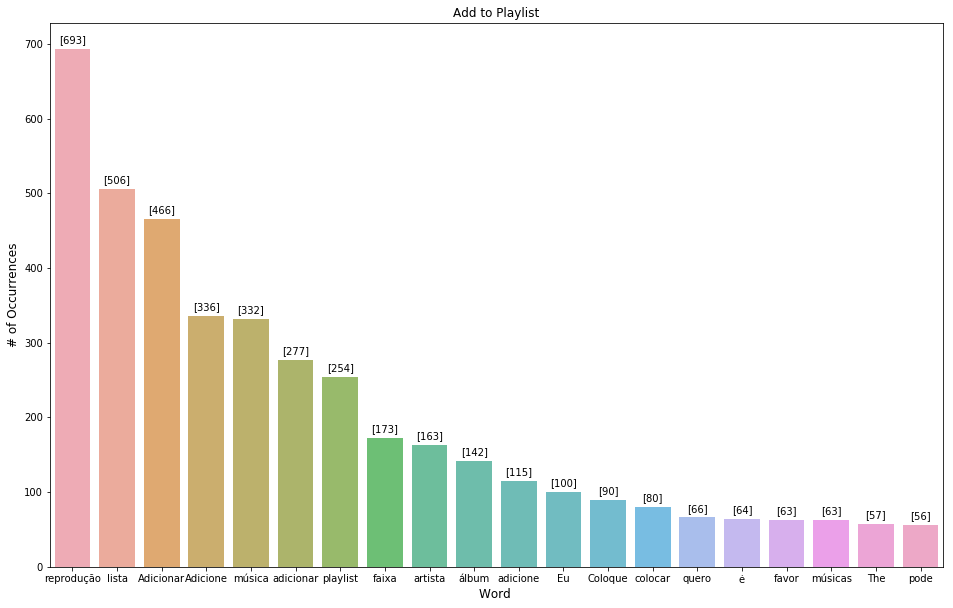

In [8]:
x = pd.DataFrame(list(common.add_to_playlist.values))
x = x.set_index(0)

#plot
plt.figure(figsize=(16,10))
ax = sns.barplot(x.index, x[1], alpha=0.8)
plt.title("Add to Playlist")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Word ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

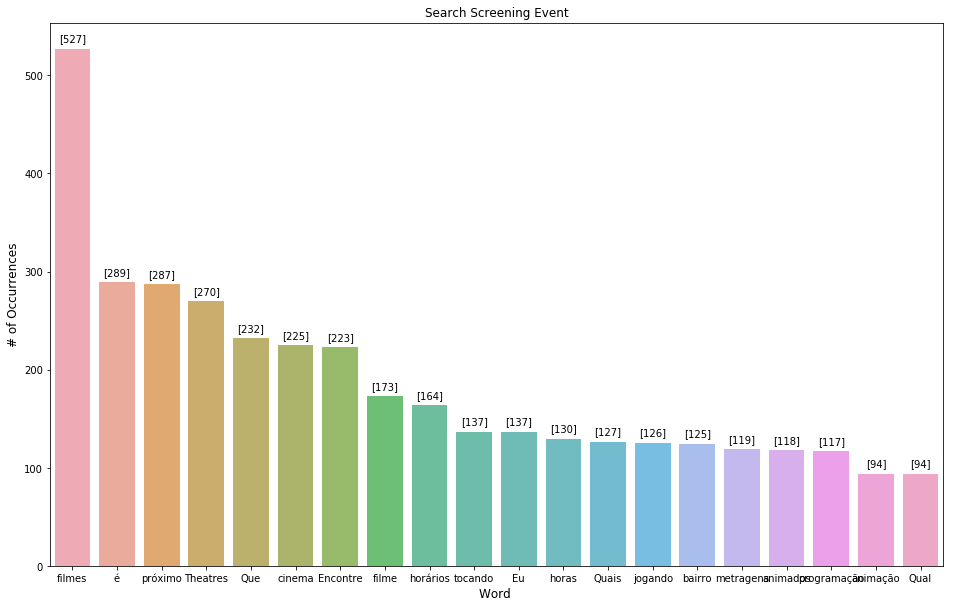

In [9]:
x = pd.DataFrame(list(common.search_screening_event.values))
x = x.set_index(0)

#plot
plt.figure(figsize=(16,10))
ax = sns.barplot(x.index, x[1], alpha=0.8)
plt.title("Search Screening Event")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Word ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

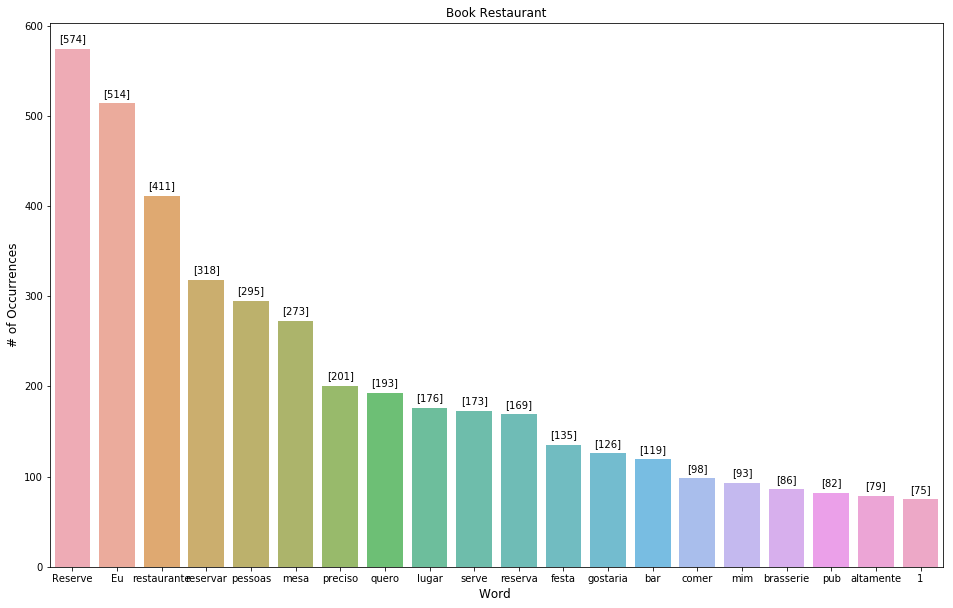

In [10]:
x = pd.DataFrame(list(common.book_restaurant.values))
x = x.set_index(0)

#plot
plt.figure(figsize=(16,10))
ax = sns.barplot(x.index, x[1], alpha=0.8)
plt.title("Book Restaurant")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Word ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

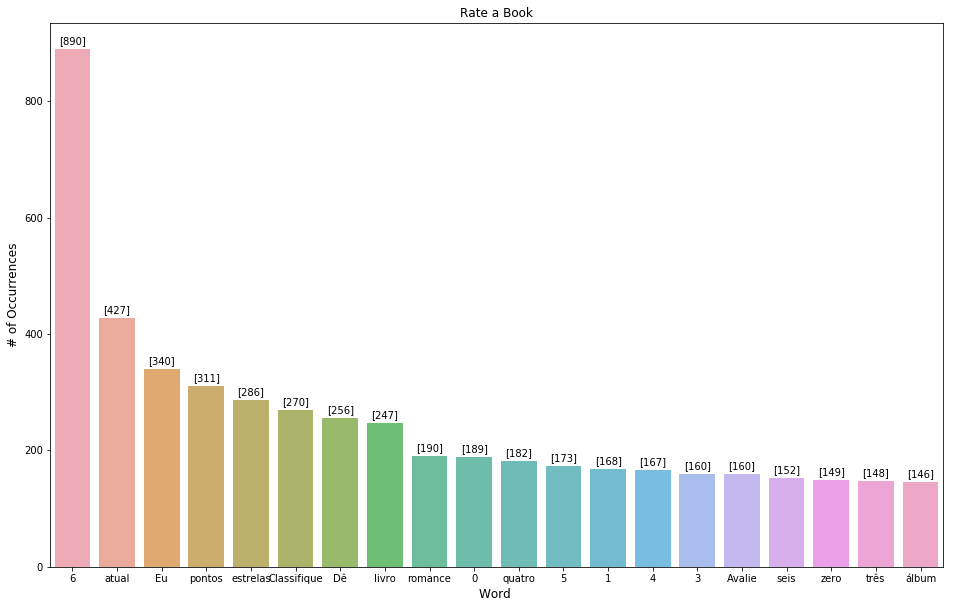

In [11]:
x = pd.DataFrame(list(common.rate_book.values))
x = x.set_index(0)

#plot
plt.figure(figsize=(16,10))
ax = sns.barplot(x.index, x[1], alpha=0.8)
plt.title("Rate a Book")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Word ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

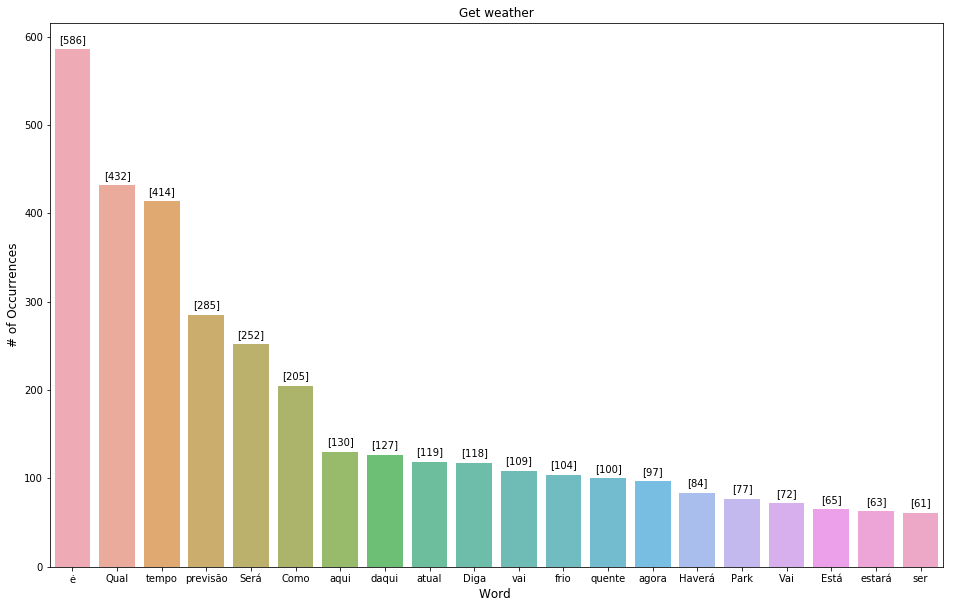

In [12]:
x = pd.DataFrame(list(common.get_weather.values))
x = x.set_index(0)

#plot
plt.figure(figsize=(16,10))
ax = sns.barplot(x.index, x[1], alpha=0.8)
plt.title("Get weather")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Word ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

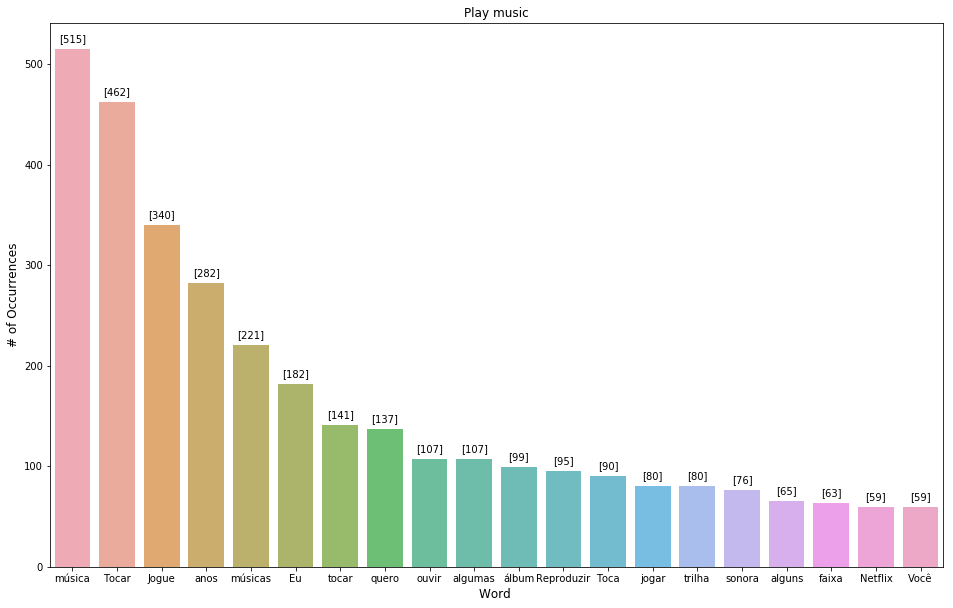

In [13]:
x = pd.DataFrame(list(common.play_music.values))
x = x.set_index(0)

#plot
plt.figure(figsize=(16,10))
ax = sns.barplot(x.index, x[1], alpha=0.8)
plt.title("Play music")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Word ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

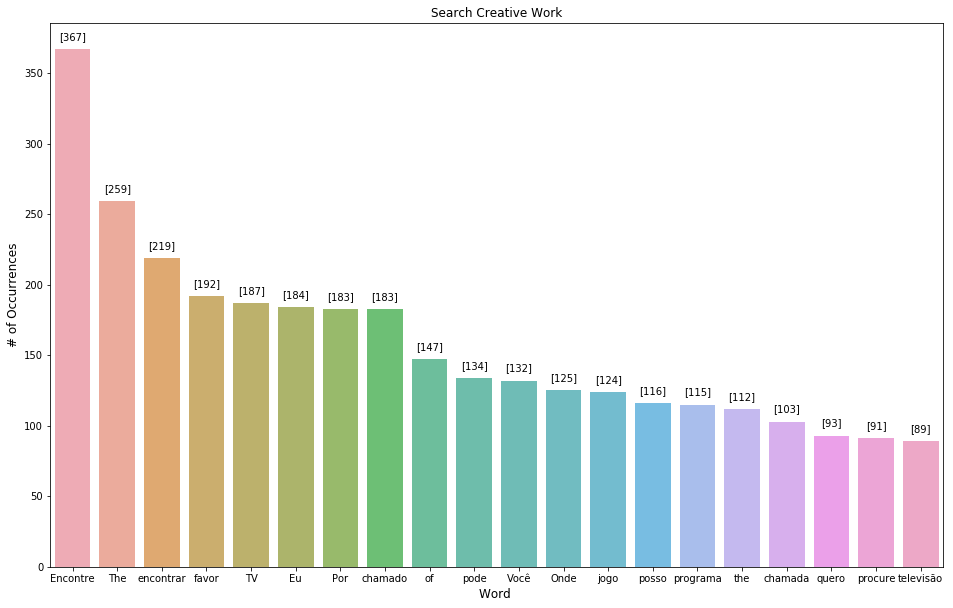

In [14]:
x = pd.DataFrame(list(common.search_creative_work.values))
x = x.set_index(0)

#plot
plt.figure(figsize=(16,10))
ax = sns.barplot(x.index, x[1], alpha=0.8)
plt.title("Search Creative Work")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Word ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

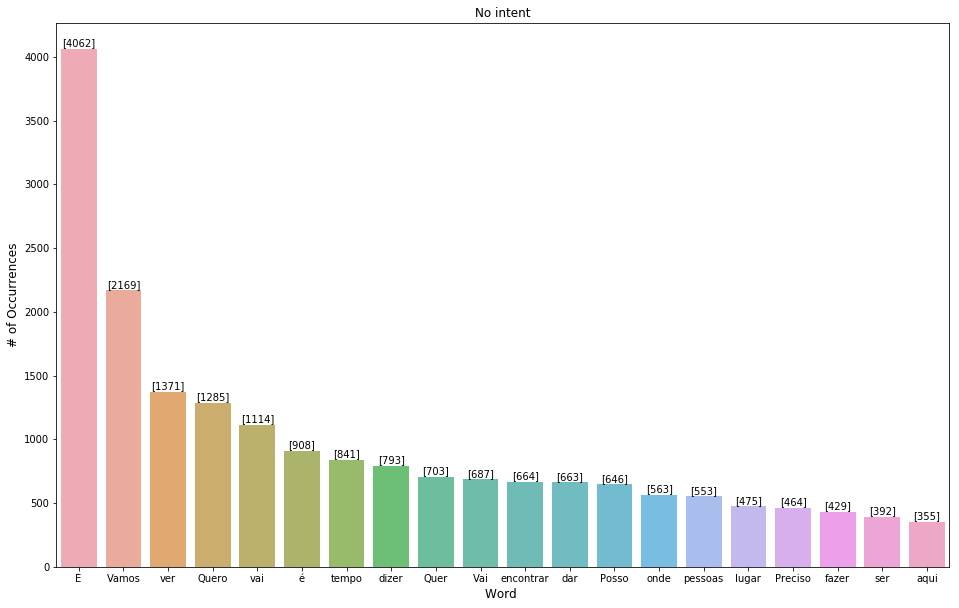

In [15]:
x = pd.DataFrame(list(common.no_intent.values))
x = x.set_index(0)

#plot
plt.figure(figsize=(16,10))
ax = sns.barplot(x.index, x[1], alpha=0.8)
plt.title("No intent")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Word ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

no_intent                 12515
get_weather                2022
book_restaurant            2010
play_music                 2007
search_screening_event     1999
search_creative_work       1997
add_to_playlist            1990
rate_book                  1987
Name: Label, dtype: int64

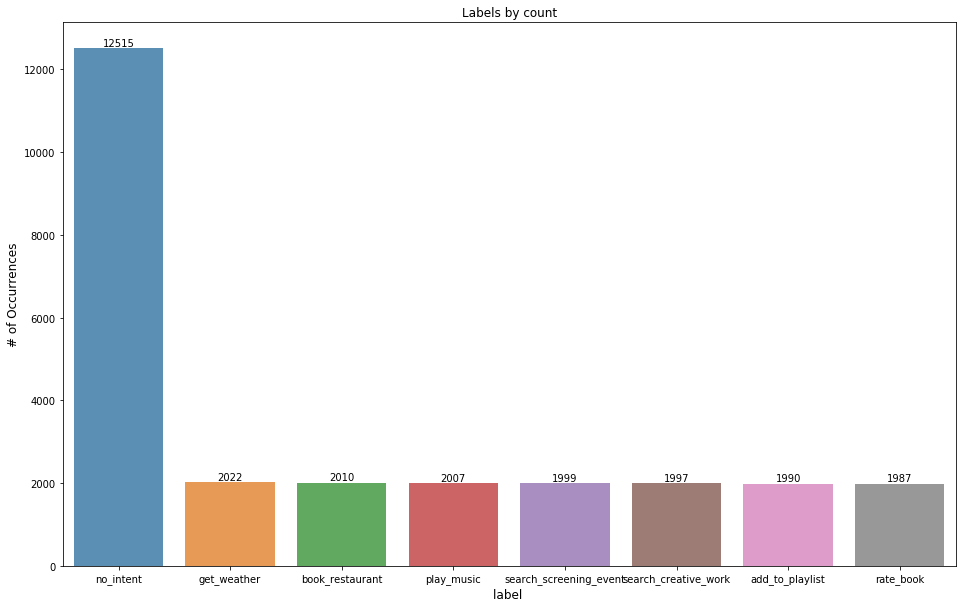

In [30]:
x = df.Label.value_counts()

#plot
plt.figure(figsize=(16,10))
ax = sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Labels by count")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('label ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

# Matrix

In [39]:
common.apply(lambda x: x[0], axis=1)

0     (reprodução, 693)
1          (lista, 506)
2      (Adicionar, 466)
3       (Adicione, 336)
4         (música, 332)
5      (adicionar, 277)
6       (playlist, 254)
7          (faixa, 173)
8        (artista, 163)
9          (álbum, 142)
10      (adicione, 115)
11            (Eu, 100)
12        (Coloque, 90)
13        (colocar, 80)
14          (quero, 66)
15              (é, 64)
16          (favor, 63)
17        (músicas, 63)
18            (The, 57)
19           (pode, 56)
dtype: object

In [55]:
conf.head()

,add_to_playlist,search_screening_event,book_restaurant,rate_book,get_weather,play_music,search_creative_work,no_intent
0,reprodução,filmes,Reserve,6,é,música,Encontre,É
1,lista,é,Eu,atual,Qual,Tocar,The,Vamos
2,Adicionar,próximo,restaurante,Eu,tempo,Jogue,encontrar,ver
3,Adicione,Theatres,reservar,pontos,previsão,anos,favor,Quero
4,música,Que,pessoas,estrelas,Será,músicas,TV,vai


In [102]:
dicty = {}
for column in conf.columns:
    a = {}
    for label in conf.columns:
        if label != column:
            a[label] = len(np.intersect1d(conf[column].values, conf[label].values)) / len(conf[column])
    
    dicty[column] = a

In [103]:
c = pd.DataFrame(dicty).sort_index()
c = c.reindex_axis(sorted(c.columns), axis=1)

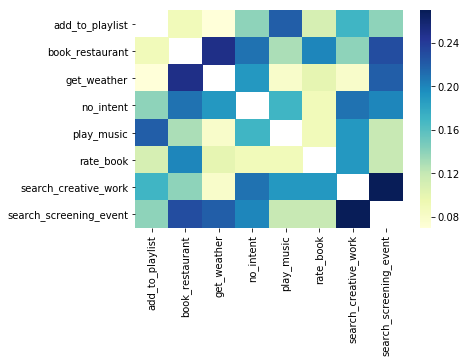

In [106]:
sns.heatmap(c, cmap="YlGnBu")

In [105]:
c

,add_to_playlist,book_restaurant,get_weather,no_intent,play_music,rate_book,search_creative_work,search_screening_event
add_to_playlist,NaN,0.09,0.07,0.14,0.22,0.11,0.17,0.14
book_restaurant,0.09,NaN,0.25,0.21,0.13,0.20,0.14,0.23
get_weather,0.07,0.25,NaN,0.19,0.08,0.10,0.08,0.22
no_intent,0.14,0.21,0.19,NaN,0.17,0.09,0.21,0.20
play_music,0.22,0.13,0.08,0.17,NaN,0.09,0.19,0.12
rate_book,0.11,0.20,0.10,0.09,0.09,NaN,0.19,0.12
search_creative_work,0.17,0.14,0.08,0.21,0.19,0.19,NaN,0.27
search_screening_event,0.14,0.23,0.22,0.20,0.12,0.12,0.27,NaN
